# Agenda :: Principal Component Analysis (PCA)
* Dataset
* Principal Component Analysis Functions in sklearn library
* Determining how much variation each principal component accounts for.
* Drawing PCA graphs using matplotlib library.
* Examine the scores to determine what variables have the largest effect on the graph.

## References and Courtesy
* [Eigenfaces for Face Detection/Recognition by Turk et al, 1991](http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf)
* [EigenFaces and A Simple Face Detector with PCA/SVD in Python by Dey](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)
* [PCA and Facial Recognition (sklearn edition) by Ryan Quan](https://nbviewer.jupyter.org/github/rcquan/sklearn-practice/blob/master/pca_eigenfaces.ipynb)
* [StatQuest: PCA in Python by Josh Starmer](https://youtu.be/Lsue2gEM9D0)

## PCA on a synthetically generated "simple" dataset

In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=58a90693f27a55b5575fd060e6952a82d7eb918369c731b970a1487976954221
  Stored in directory: /Users/vyanjana/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
## Generate a small dataset
variables = ['v' + str(i) for i in range(1,101)]
variables[:5]

['v1', 'v2', 'v3', 'v4', 'v5']

In [4]:
S = ['S' + str(i) for i in range(1,6)]  #5 p type samples
T = ['T' + str(i) for i in range(1,6)]  #5 q type samples


In [5]:
dataset = pd.DataFrame(columns=[*S,*T], index=variables)
dataset.head()

,S1,S2,S3,S4,S5,T1,T2,T3,T4,T5
v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.index

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51',
       'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61',
       'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71',
       'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81',
       'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91',
       'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100'],
      dtype='object')

In [7]:
#Now fill in the blanks
import random as rd
for v in dataset.index:
    dataset.loc[v,'S1':'S5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    dataset.loc[v,'T1':'T5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    

In [8]:
dataset.shape

(100, 10)

In [9]:
dataset = dataset.T
print(dataset.shape)
dataset.head(n=10)

(10, 100)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
S1,776,176,921,749,948,21,150,783,573,941,...,765,793,108,563,593,502,386,470,250,1049
S2,835,164,974,681,982,22,141,800,588,950,...,689,784,108,561,633,479,447,442,279,976
S3,816,176,922,668,996,13,164,790,623,970,...,705,807,116,600,701,495,395,451,290,944
S4,781,181,946,659,959,28,148,785,611,850,...,720,805,106,578,646,461,387,468,271,964
S5,799,183,994,687,896,22,163,836,610,982,...,741,788,99,572,631,485,392,443,280,960
T1,895,458,924,621,895,302,695,813,213,449,...,99,891,969,817,935,428,655,706,129,723
T2,960,441,861,652,821,328,667,808,175,530,...,126,966,933,840,906,425,697,755,106,737
T3,944,468,885,627,809,320,660,862,226,479,...,130,981,979,850,895,427,741,762,103,781
T4,986,482,861,604,823,320,600,865,250,518,...,145,953,979,906,922,433,758,748,115,704
T5,907,455,866,641,779,336,660,852,213,489,...,140,943,933,855,920,421,649,722,106,720


In [10]:
dataset.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
S1,776,176,921,749,948,21,150,783,573,941,...,765,793,108,563,593,502,386,470,250,1049
S2,835,164,974,681,982,22,141,800,588,950,...,689,784,108,561,633,479,447,442,279,976
S3,816,176,922,668,996,13,164,790,623,970,...,705,807,116,600,701,495,395,451,290,944
S4,781,181,946,659,959,28,148,785,611,850,...,720,805,106,578,646,461,387,468,271,964
S5,799,183,994,687,896,22,163,836,610,982,...,741,788,99,572,631,485,392,443,280,960


In [11]:
scaled_dataset = preprocessing.scale(dataset) 
#This is Same as StandardScaler().fit_transform(dataset.T)
#it makes the (mean=0, stdev=1)

In [12]:
scaled_dataset.shape

(10, 100)

In [13]:
scaled_dataset[:,:]

array([[-1.26655155, -0.99716954,  0.12528121,  2.30233072,  0.764288  ,
        -0.99966506, -1.00857823, -1.2031891 ,  0.849564  ,  0.99584075,
        -1.06451041,  1.30475849, -0.18135148, -1.01365102,  1.07168781,
        -0.72748409, -1.68228076,  0.06489616,  0.72049675, -1.15164299,
         1.1897311 , -0.97805019,  1.01199821,  0.86811474, -1.08190906,
        -0.82240114,  0.95005877, -0.09051962,  0.83645787,  1.08116253,
        -0.51553528, -0.45696895,  0.69689706,  1.05457547, -0.41326894,
         1.02492118, -0.96663084, -0.9891743 ,  0.87678011,  1.00570482,
         0.19642818, -1.00277106, -0.98769705, -1.25045397, -1.00287765,
         0.9426675 , -1.21088689,  1.46539642,  1.01658644, -1.04127444,
         0.61808571, -1.01467433, -1.01697877,  0.71461184, -1.1000496 ,
        -1.03783059, -0.99591107,  0.89514674, -0.90301909,  1.266837  ,
         0.92084207, -0.97576338,  0.99715901, -0.96888097, -0.86996843,
        -1.02290891, -1.00955754,  0.96176747, -0.6

In [14]:
pca = PCA()
pca.fit(scaled_dataset)
pca_data = pca.transform(scaled_dataset)

In [15]:
#Calculate the percentage of variation that each principal component accounts for.
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([88.4,  3.1,  2.3,  1.8,  1.4,  0.9,  0.8,  0.6,  0.5,  0. ])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 
#One label per principal component, PC1, PC2, etc.

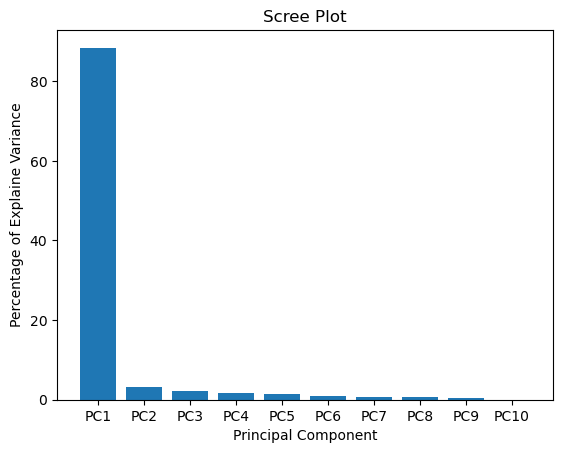

In [17]:
%matplotlib inline
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explaine Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Now draw the PCA plot.
pca_df = pd.DataFrame(pca_data, index=[*S, *T], columns=labels)
pca_df

In [ ]:
%matplotlib inline
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [ ]:
# Returning ranks of variables in terms of importance in the dataset
scores = pd.Series(pca.components_[0], index=variables)
scores

In [ ]:
sorted_scores = scores.abs().sort_values(ascending=False)
sorted_scores

In [ ]:
#top 10 variables
top_10_vars = sorted_scores[0:10].index.values
top_10_vars

In [ ]:
print(scores[top_10_vars])

# PCA on a real dataset
### [Extended Yale Face database](http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html)
* Alternate link [Dr. B's Google drive](https://drive.google.com/drive/folders/1fGeakThkPMqO0BbPgnOKLJeP8ojsYuZQ?usp=sharing)
* The extended Yale Face Database B contains 16128 images of 28 human subjects under 9 poses and 64 illumination conditions.

In [ ]:
#os.chdir('..')

In [ ]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from PIL import Image

#!pwd
#data_dir = "CroppedYale"
#os.chdir(data_dir)
#!ls

## Converting .pgm to .png
* If your files are not already in the .png format, you can use this block of code to convert the file using the UNIX shell. Luckily, I'm providing you png versions too :D Cheers


In [ ]:
# converting from svg to png
#from glob import glob
#%cd $data_dir
#files=glob('yaleB*/*.pgm')
#print('number of files is %d'%len(files))
#files

In [ ]:
#count=0
#for f in files:
#    new_f=f[:-3]+'png'
#    #!convert $f $new_f
#    Image.open(f).save('../CroppedYale+PNG/'+new_f)
#    count += 1
#    if count % 100==0:
#        print('%d, %s, %s'%(count,f,new_f))

* This image_grid_ function reshapes the array into its original dimensions and plots the image in a grid. The col parameter allows you to specify the number of images in each row.

In [ ]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

# Loading the dataset
* create_filenames allows the users to specify the current working directory where the CroppedYale folder resides and the image view for the subjects.

In [ ]:
def create_filenames(data_dir, view_list):
    # loads the pictures into a list
    # data_dir: the CroppedYale folder
    # view_list: the views you wish to grab
    dir_list = os.listdir(data_dir)
    file_list = []
    for dir in dir_list:
        if not dir.startswith('.'):
            for view in view_list:
                filename = "%s/%s_%s.png" % (dir, dir, view)
                file_list.append(filename)
    return(file_list)


view_list = ['P00A+000E+00', 'P00A+005E+10' , 'P00A+005E-10' , 'P00A+010E+00']

file_list = create_filenames('CroppedYale+PNG/', view_list)
len(file_list)

In [ ]:
file_list

## Face data

In [ ]:
!pwd

In [ ]:
# open image
im = Image.open('CroppedYale+PNG/'+file_list[0]).convert("L")
# get original dimensions
H,W = np.shape(im)
print('shape=%d x %d => %d pixels'%(H,W, H*W))


im_number = len(file_list)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open('CroppedYale+PNG/'+file_list[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

image_grid(arr,H,W)

In [ ]:
arr.shape

In [ ]:
arr[0,:].shape

## Question 1: Calculate and draw the "mean" face

In [ ]:
# let's find the mean_image
mean_image = np.zeros(H*W,)

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.figure()
plt.hist(mean_image,bins=100);

In [ ]:
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image

In [ ]:
# plot the first 10 normalized faces
image_grid(arr_norm[:10,:],H,W)

# Question 2: Principal Component Analysis on centered face data

In [ ]:
#!pip install scikit-learn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
#TODO

## Question 3: Scree Plot

In [ ]:
# Let's make a scree plot
pve = pca.explained_variance_ratio_
print(pve.shape)
#plt.plot(range(len(pve)), pve)
plt.bar(x = range(1, len(pve)+1), height=pve)


plt.title("Scree Plot")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component Number")




## Question 4: Draw the Eigenfaces
* The eigenvectors of the variance-covariance matrix of our "face" data represent the so-called "eigenfaces". 
* They represent the direction of greatest variability in our "face space". We plot the all the eigenfaces here.

In [ ]:
# eigenfaces


## Now, the fun begin!!!

# Question 5: Projection on the EigenFaces and Image reconstruction
* let’s project a face onto the face space to generate a vector of k coefficients, one for each of the k eigenfaces (for different values of k). Then let’s reconstruct the same face from the vector of coefficients computed.

In [ ]:
#Original image ... pick couple from a pool of 152 faces
index = [1,5,9,100,139]
print(arr.shape)

In [ ]:
image_grid(reconstructed_images, H, W, cols=3)

# Question 6: Now, let's project onto fewer eigenfaces
## and reconstruct back

* It means, more compression! And we will judge based on the reconstruction error

## With 1 eigen face.

## With 2 eigen faces.

## With 5 eigen faces.

## With 10 eigen faces.

## With 25 eigen faces.

## With 50 eigen faces.

# Fin!